# Лабораторная работа №5
## ПРИМЕНЕНИЕ СИНГУЛЯРНОГО СПЕКТРАЛЬНОГО АНАЛИЗА ДЛЯ ДЕКОМПОЗИЦИИ ВРЕМЕННОГО РЯДА
### Комлева Юлия Владимировна
### Вариант: 9
### Группа: РИМ-181226

In [2]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

Метод сингулярного спектрального анализа SSA:
1. Этап разложения
    - Шаг вложения
    - Шаг сингулярного разложения
    
2. Этап восстановления
    - Шаг группировки
    - Шаг усреднения

### Этап разложения
#### Шаг вложения
$F=f(t)=\left\{ f(t_0),...,f(t_{N-1})\right\}$ - исследуемый временной ряд с числом отсчетов $N$, $t_i=i\Delta t,$, где $\Delta t$ - период выборки.

Процедура вложения переводит исходный временной ряд в последовательность многомерных векторов. Процедура вложения образует $K=N-L+1$ векторов вложения, имеющих размерность $L$.
$$X_i=(f_{i-1},...,f_{i+L-2})^T,~1 \leq i\leq K$$
$X$ - траекторная матрица ряда $F$ и состоит из векторов вложения  в качестве столбцов $X=[X_1:...:X_K]$
$$X=\left( x_{ij}\right) ^{L,K}_{i,j=1}=\left( \begin{matrix}f_0&&f_1&&f_2&&\cdots &&f_{K-1} \\ f_1&&f_2&&f_3&&\cdots &&f_K \\ f_2&&f_3&&f_4&&\cdots &&f_{K+1} \\ \vdots &&\vdots &&\vdots && \ddots &&\vdots \\ f_{L-1}&&f_L&&f_{L+1}&&\cdots &&f_{N-1}\end{matrix}\right)$$
Очевидно, что $x_{ij}=f_{i+j-2}$ и поэтому матрица $X$ имеет одинаковые элементы на «диагоналях» $i+j=const$. Таким образом, траекторная матрица является ганкелевой. Существует взаимно-однозначное соответствие между ганкелевыми матрицами размерности $L\times K$ и рядами длины $N=L+K-1$
#### Шаг сингулярного разложения
Singular Value Decomposition = SVD траекторной матрицы ряда. 

Пусть $S=XX^T$. $\lambda _1,...,\lambda _L$ - собственные числа матрицы $S$, взятые в неубывающем порядке $(\lambda  _1 \geq \lambda  _2 \geq ... \geq \lambda _L \geq 0)$ и $U_1,...,U_L$ – ортонормированную систему собственных векторов матрицы $S$, соответствующих собственным числам.

Пусть $d=\max \{ i:\lambda _i > 0\}$. Обозначим $V_i=X^TU_i / \sqrt{\lambda _1}$, $~i=1,...,d,$. Тогда сингулярное разложение матрицы $X$: $X=X_1+...+X_d$, где $X_i=\sqrt{\lambda _i}U_iV^T_i$. 

Каждая из этих матриц $X_i$ имеет ранг 1. Поэтому их можно назвать элементарными матрицами. 

Набор $\left( \sqrt{\lambda _i},U_i,V_i\right)$ называют $i$-й __собственной тройкой__ сингулярного разложения.

In [6]:
def SSA_modes(F, L):
    N = len(F)
    K = N - L + 1
    X = np.empty((L, K))
    #шаг вложения
    for i in range(0, L): #rows
        for j in range(0, K):
            X[i,j] = F[i+j]
    #шаг сингулярного разложени]
    S = np.dot(X, X.T)
    U, A, _ = np.linalg.svd(S)
    # U - матрица собственных векторов
    # A - массив собственных чисел (в неубывающем порядке)
    V = np.dot(X.T, U) #матрица траекторных векторов
    return A, U, V

##### Проверка

In [7]:
ts = np.array([3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3]) # мини временной ряд
A, U, V = SSA_modes(ts, 3) # его разложение с длиной окна = 3
#print(A) # собственные числа
#print(U) # собственные вектора
#print(V) # траекторные вектора

check_A = np.array([129.66842566, 12., 3.33157434])
check_U = np.array( [[-5.78869570e-01, 7.07106781e-01, 4.06091149e-01],
[-5.74299610e-01, 4.14039445e-16, -8.18645196e-01],
[-5.78869570e-01, -7.07106781e-01, 4.06091149e-01]])
check_V = np.array([[-3.46407750e+00, 1.41421356e+00, -1.29257973e-02],
[-2.88977789e+00, 0.00000000e+00, 8.05719399e-01],
[-3.46407750e+00, -1.41421356e+00, -1.29257973e-02],
[-4.03837711e+00, 8.88178420e-16, -8.31570994e-01],
[-3.46407750e+00, 1.41421356e+00, -1.29257973e-02],
[-2.88977789e+00, 0.00000000e+00, 8.05719399e-01],
[-3.46407750e+00, -1.41421356e+00, -1.29257973e-02],
[-4.03837711e+00, 8.88178420e-16, -8.31570994e-01],
[-3.46407750e+00, 1.41421356e+00, -1.29257973e-02],
[-2.88977789e+00, 0.00000000e+00, 8.05719399e-01],
[-3.46407750e+00, -1.41421356e+00, -1.29257973e-02]])

np.allclose(A, check_A) and np.allclose(U, check_U) and np.allclose(V, check_V)

True

### Этап восстановления
#### Шаг группировки
На основе разложения $X=X_1+...+X_d$, где $X_i=\sqrt{\lambda _i}U_iV^T_i$ процедура группировки, по сути, делит все множество индексов $\{1,...,d\}$ на $m$ непересекающихся подмножеств $I_1,...,I_m$.

Пусть $I=\{i_1,...i_p\}$. Тогда результирующая матрица $X_I$  соответствующая группе $I$ определяется как $X_I=X_{i_1}+...+X_{i_p}$. Такие матрицы вычисляются для $I=I_1,...,I_m$, тем самым разложение  может быть записано в сгруппированном виде: $X=X_{I_1}+...+X_{I_m}$

Процедура выбора множеств $I=I_1,...,I_m$ и называется группировкой собственных троек. 
#### Шаг диагонального усреднения
Каждая матрица сгруппированного разложения переводится в новый ряд длины $N$.

Пусть $Y$ – некоторая $L\times K$ матрица с элементами $y_{ij}$, где $1 \leq i \leq  L$, $1\leq j \leq K$.  Положим $L^*=\min(L,K)$, $K^*=\max(L,K)$  и $N=L+K-1$. Пусть $y^*_{ij}=y_{ij},$ если $L\leq K$ и $y^*_{ij}=y_{ij}$ – иначе. __Диагональное усреднение__ переводит матрицу  во временной ряд  по формуле:

$$g_k=\left\{ \begin{matrix} \frac {1}{k+1}\sum \limits^{k+1}_{m=1}y^*_{m,k-m+2} && 0\leq k < L^*-1, \\ \frac {1}{L^*}\sum \limits^{L^*}_{m=1}y^*_{m,k-m+2}&&L^*-1\leq k < K^*, \\ \frac {1}{N-k}\sum \limits^{N-K^*+1}_{m=k-K+2}y^*_{m,k-m+2}&&K^*\leq k<N.\end{matrix} \right. $$

### бла-бла-бла

In [74]:
def SSA_group(A, U, V, N, I):
    
    L = len(A)
    K = N - L + 1

    #шаг группировки
    V = V.transpose()
    Z = np.dot(U[:, I], V[I, :])

    #этап диагонального усреднения
    G = np.zeros(N)
    L_ = min(L, K)
    K_ = max(L, K)    
    
    for k in range(0, L_):
        for m in range(0, k + 1):
            G[k] += Z[m][k-m]
        G[k] *= 1/(k+1)
    for k in range(L_, K_):
        for m in range(0, L_):    
            G[k] += Z[m][k-m]   
        G[k] *= 1/L_
    for k in range(K_, N):
        for m in range(k-K_+1, N-K_+1):
            G[k] += Z[m][k-m]
        G[k] *= 1/(N-k)
    return G

In [43]:
ts

array([3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3])

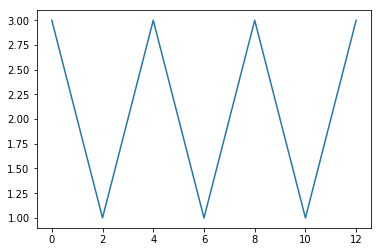

In [44]:
plt.plot(ts)

In [45]:
#A

In [75]:
ts1 = SSA_group(A, U, V, len(ts), [0, 1, 2])
print(ts1)
np.allclose(ts, ts1)

[3. 2. 1. 2. 3. 2. 1. 2. 3. 2. 1. 2. 3.]


True

In [109]:
ssa0 = SSA_group(A, U, V, len(ts), [0])
ssa1 = SSA_group(A, U, V, len(ts), [1])
ssa2 = SSA_group(A, U, V, len(ts), [2])
ssa01 = SSA_group(A, U, V, len(ts), [0, 1])
ssa02 = SSA_group(A, U, V, len(ts), [0, 2])
ssa12 = SSA_group(A, U, V, len(ts), [1, 2])

In [118]:
with np.printoptions(precision=1, suppress=True):
    print("[0]    ", ssa0)
    print("[1]    ", ssa1)
    print("[2]    ", ssa2)
    print("[0, 1] ", ssa01)
    print("[0, 2] ", ssa02)
    print("[1, 2] ", ssa12)

[0]     [2.  1.8 1.9 2.  2.1 2.  1.9 2.  2.1 2.  1.9 1.8 2. ]
[1]     [ 1.   0.  -0.7  0.   0.7 -0.  -0.7  0.   0.7 -0.  -0.7 -0.   1. ]
[2]     [-0.   0.2 -0.2  0.   0.2  0.  -0.2  0.   0.2  0.  -0.2  0.2 -0. ]
[0, 1]  [3.  1.8 1.2 2.  2.8 2.  1.2 2.  2.8 2.  1.2 1.8 3. ]
[0, 2]  [2.  2.  1.7 2.  2.3 2.  1.7 2.  2.3 2.  1.7 2.  2. ]
[1, 2]  [ 1.   0.2 -0.9  0.   0.9  0.  -0.9  0.   0.9  0.  -0.9  0.2  1. ]


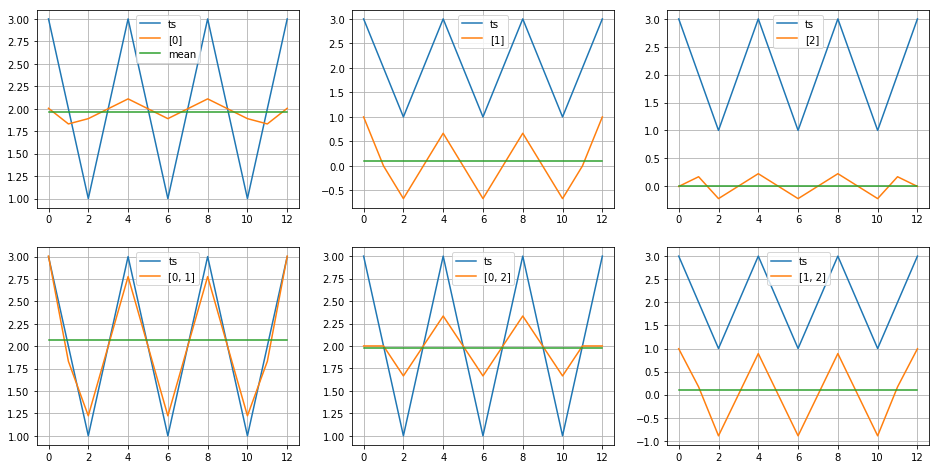

In [125]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
ax[0,0].plot(ts)
ax[0,0].plot(ssa0)
ax[0,0].plot([np.mean(ssa0)]*13)

ax[0,1].plot(ts)
ax[0,1].plot(ssa1)
ax[0,1].plot([np.mean(ssa1)]*13)

ax[0,2].plot(ts)
ax[0,2].plot(ssa2)
ax[0,2].plot([np.mean(ssa2)]*13)

ax[1,0].plot(ts)
ax[1,0].plot(ssa01)
ax[1,0].plot([np.mean(ssa01)]*13)

ax[1,1].plot(ts)
ax[1,1].plot(ssa02)
ax[1,1].plot([np.mean(ssa02)]*13)

ax[1,2].plot(ts)
ax[1,2].plot(ssa12)
ax[1,2].plot([np.mean(ssa12)]*13)

ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()
ax[1, 0].grid()
ax[1, 1].grid()
ax[1, 2].grid()
ax[0, 0].legend(["ts", "[0]", "mean"])
ax[0, 1].legend(["ts", "[1]", "mean"])
ax[0, 2].legend(["ts", "[2]", "mean"])
ax[1, 0].legend(["ts", "[0, 1]", "mean"])
ax[1, 1].legend(["ts", "[0, 2]", "mean"])
ax[1, 2].legend(["ts", "[1, 2]", "mean"])
plt.show()

- 0-компонента содержит некоторое среднее плавающее значение ряда (тренд) 
    - np.mean(ssa0) = 1.97
- 1-компонента и 2-компонента имеют среднее значение близкое к нулю
    - np.mean(ssa1) = 0.1
    - np.mean(ssa2) = 0.01
- 1-компонента и 2-компонента имеют одинаковый период, так как любая периодическая составляющая методом SSA всегда разлагается на парные компоненты. 
- амплитуда 1-компоненты выше амплитуды 2-компоненты, так как массив собственных чисел упорядочен по убыванию, то есть с ростом номера компоненты ее «вклад» в исходный ряд уменьшается.

Важно отметить, что с ростом длины окна $L$ разложения, все
составляющие ряда будут «расплываться» по нескольким
компонентам. То есть тренд не всегда есть 0-компонента, а скорее
комбинация компонент с номерами близкими к нулю, а периодика не
равна одной паре компонент, а есть комбинация нескольких пар с
близкими номерами. Тем не менее, общий характер особенностей сохраняется.

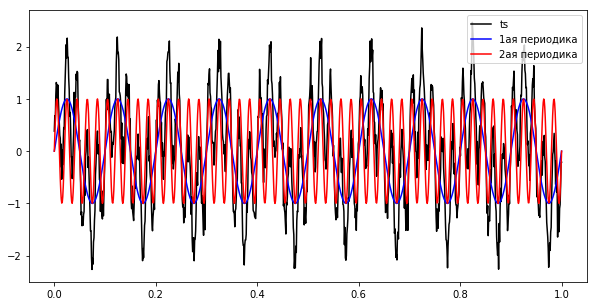

In [131]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + 0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k', label = 'ts')
plt.plot(t, np.sin(2*np.pi*f1*t), 'b', label = '1ая периодика')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r', label = '2ая периодика')
plt.legend()
plt.show()

Подобранный размер окна L = 16

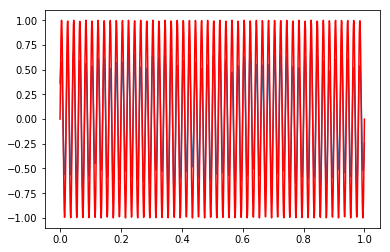

In [171]:
A, U, V = SSA_modes(F, 16)
ssaF = SSA_group(A, U, V, len(F), [1])
#plt.plot(F)
plt.plot(t, ssaF)
plt.plot(t, np.sin(2*np.pi*f2*t), 'r', label = '2ая периодика')

In [172]:
wtf = np.sin(2*np.pi*f2*t)
sum(wtf - ssaF)

-0.3895500557662555

-3.749623963589956 13
-3.6768187373164314 15
-3.6657526320935077 16 + 1я периодика -0.3895500557662555 2я периодика
-3.6914875674230614 17




In [173]:
A, U, V = SSA_modes(F, 16)
ssaF0 = SSA_group(A, U, V, len(F), [0])
ssaF1 = SSA_group(A, U, V, len(F), [1])
ssaF2 = SSA_group(A, U, V, len(F), [2])
ssaF01 = SSA_group(A, U, V, len(F), [0, 1])
ssaF02 = SSA_group(A, U, V, len(F), [0, 2])
ssaF12 = SSA_group(A, U, V, len(F), [1, 2])

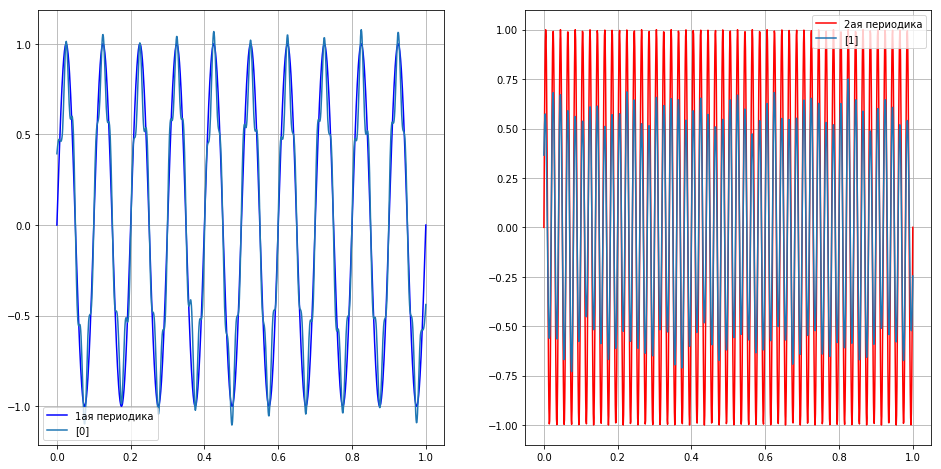

In [183]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(t, np.sin(2*np.pi*f1*t), 'b')
ax[0].plot(t, ssaF0)


ax[1].plot(t, np.sin(2*np.pi*f2*t), 'r')
ax[1].plot(t, ssaF1)




ax[0].grid()
ax[1].grid()
ax[0].legend(["1ая периодика", "[0]"])
ax[1].legend(["2ая периодика", "[1]"])
plt.show()

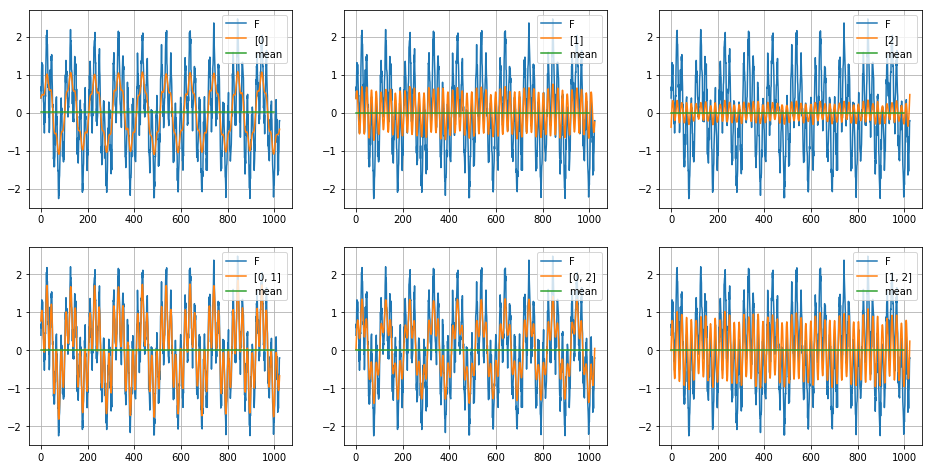

In [176]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
ax[0,0].plot(F)
ax[0,0].plot(ssaF0)
ax[0,0].plot([np.mean(ssaF0)]*1000)

ax[0,1].plot(F)
ax[0,1].plot(ssaF1)
ax[0,1].plot([np.mean(ssaF1)]*1000)

ax[0,2].plot(F)
ax[0,2].plot(ssaF2)
ax[0,2].plot([np.mean(ssaF2)]*1000)

ax[1,0].plot(F)
ax[1,0].plot(ssaF01)
ax[1,0].plot([np.mean(ssaF01)]*1000)

ax[1,1].plot(F)
ax[1,1].plot(ssaF02)
ax[1,1].plot([np.mean(ssaF02)]*1000)

ax[1,2].plot(F)
ax[1,2].plot(ssaF12)
ax[1,2].plot([np.mean(ssaF12)]*1000)

ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()
ax[1, 0].grid()
ax[1, 1].grid()
ax[1, 2].grid()
ax[0, 0].legend(["F", "[0]", "mean"])
ax[0, 1].legend(["F", "[1]", "mean"])
ax[0, 2].legend(["F", "[2]", "mean"])
ax[1, 0].legend(["F", "[0, 1]", "mean"])
ax[1, 1].legend(["F", "[0, 2]", "mean"])
ax[1, 2].legend(["F", "[1, 2]", "mean"])
plt.show()

In [ ]:
t = np.linspace(0,4,4096)
F = np.exp(-0.4*np.pi*t) + 0.5*rand.randn(len(t))